### Exercise 8.7
PH 295  
Nick Ball  
**Purpose:**
Solves four first-order equations using RK4 to calculate the distance a cannonball travels with air resistance.

*Force of Air Resistance on a Moving Object:*
$$
F = \frac{1}{2} \pi R^2 \rho C v^2
$$
  
*Equations of Motion for (x,y) of the cannonball:*
$$
\ddot{x} = -\frac{\pi R^2 \rho C}{2m} \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2}, \, \, \, \, \ddot{y} = -g-\frac{\pi R^2 \rho C}{2m} 
\dot{y} \sqrt{\dot{x}^2 + \dot{y}^2}
$$

a) Starting from Newton's second law, $F = ma$, show that the equations of motion for the position (x,y) pf the cannonball are the above equations of motion (x,y) of the cannonball.

Starting with,
$$
F = ma
$$
  
We can set up a triangle for the outgoing velocities and counteracting forces. Since these are the same, we can equate them with: 
  
$$
\frac{v}{v_x} = \frac{F_{drag}}{F_{dragx}} \longrightarrow \, F_{dragx} = \frac{v_x F_{drag}}{v}
$$ 

We can divide out mass in both instances of $F_{drag}$ to get
$$
a_x = -\frac{\pi R^2 \rho C}{2m} \frac{v_x v^2}{v}
$$
  
One of the velocities cancel out, and you are left with:
$$
\ddot{x} = -\frac{\pi R^2 \rho C}{2m} \dot{x} \sqrt{\dot{x}^2 + \dot{y}^2}
$$
  
The same process can be applied in the y direction, but with the inclusion of gravitational acceleration g:
  
$$
\ddot{y} = -g-\frac{\pi R^2 \rho C}{2m} \dot{y} \sqrt{\dot{x}^2 + \dot{y}^2}
$$

b) Change these two second order equations into four first-order equations, then write a program that solves for a cannonball of mass 1kg and radius 8cm, shot at 30 degrees to the horizontal with initial velocity 100$\frac{m}{s}$. The density of air is 1.22$\frac{kg}{m^3}$ for a sphere and C = 0.47. Plot it also.

In [16]:
#Import Libraries
from numpy import pi, sqrt, arange, array, cos, sin, inf
from matplotlib import pyplot as plt

In [2]:
#Define functions
def f(r,t):
    x = r[0]      #Position x in m
    y = r[1]      #Position y in m
    vx = r[2]     
    vy = r[3]     
    fx = vx       #dx/dt in m/s
    fy = vy       #dy/dt in m/s
    fvx = -pi*R**2 * ρ* C * fx*sqrt(fx**2 + fy**2)/2/m
    fvy = -g-pi*R**2 * ρ* C*fy*sqrt(fx**2 + fy**2)/2/m     #might not be fully correct
    return array([fx,fy,fvx,fvy],float)

#RK4
def RK4(r,t):
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    return (k1+2*k2+2*k3+k4)/6

#Define constants
g = 9.81        #m/s^2
R = 0.08        #m
C = 0.47
ρ = 1.22        #1.22 kg/m^3
m = 100           #kg

#Define variables
xpoints = []
ypoints = []
tpoints = []

#Define initial conditions
t = 0.0                     #s
θ = 30*pi/180               #rad
v = 100                     #m/s
r = array([0,0,v*cos(θ),v*sin(θ)],float)
h = 0.001

#RK4
while r[1] >= 0:
    xpoints.append(r[0])
    ypoints.append(r[1])
    tpoints.append(t)
    
    r += RK4(r,t)
    t += h

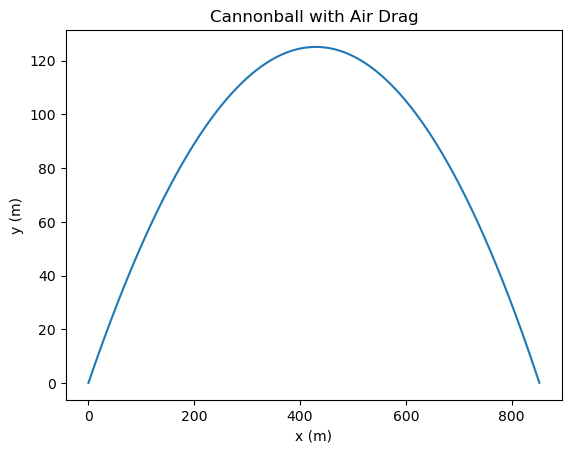

In [5]:
plt.plot(xpoints,ypoints)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cannonball with Air Drag")
plt.show()

c) Experiment to see if the cannonball travels further with greater mass or less mass. Describe what you see

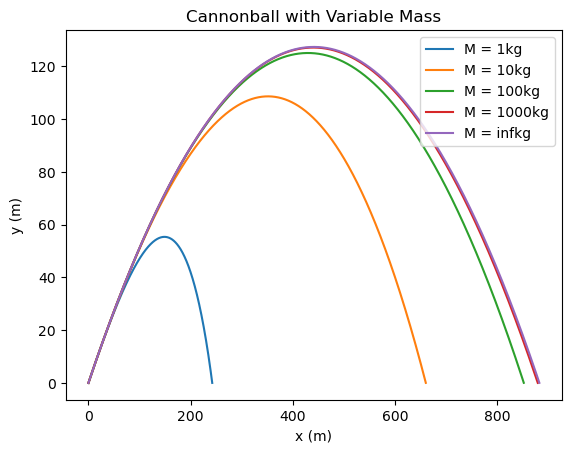

In [17]:
mass = [1,10,100,1000,inf]

for m in mass:
    #Clear old points
    xpoints.clear()
    ypoints.clear()
    
    #reset r
    r = array([0,0,v*cos(θ),v*sin(θ)],float)
    
    #RK4
    while r[1] >= 0:
        xpoints.append(r[0])
        ypoints.append(r[1])
        tpoints.append(t)
    
        r += RK4(r,t)
        t += h
    
    plt.plot(xpoints,ypoints, label = f'M = {m}kg')

plt.legend(loc="upper right")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Cannonball with Variable Mass")
plt.show()

**Conclusion:**
Making it have greater mass is a great way to increase distance, and also damage done to the enemy vessel tryin to plunder your loot.